In [5]:
import os
import pandas as pd

# folder where your csv files live
folder_path = r"../../data/raw/binary_kaggle/RoadCondition"   

# permanent dataframe
combined_df = pd.DataFrame()

for file in os.listdir(folder_path):
    if file.lower().endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        first_letter = file[0].lower()

        if first_letter == "g":
            temp_df = pd.read_csv(file_path)
            temp_df["roadCondition"] = "Good"
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

        elif first_letter == "b":
            temp_df = pd.read_csv(file_path)
            temp_df["roadCondition"] = "Bad"
            combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

# save final combined dataset
combined_df.to_csv("../../data/combined/binary_kaggle.csv", index=False)


In [6]:
df = pd.read_csv("../../data/combined/binary_kaggle.csv")
df.head()



,timestamp,latitude,longitude,speed,accelerometerX,accelerometerY,accelerometerZ,gyroX,gyroY,gyroZ,roadCondition
0,1.492618e+09,40.479540,-79.922397,1.17,-0.030884,-0.852554,0.499725,-0.030093,-0.089149,0.048968,Bad
1,1.492618e+09,40.479540,-79.922397,1.17,0.018356,-0.918076,0.301804,-0.046515,-0.044369,0.028426,Bad
2,1.492618e+09,40.479540,-79.922397,1.17,0.180893,-0.925156,0.432632,-0.040333,0.055567,-0.057066,Bad
3,1.492618e+09,40.479521,-79.922406,2.45,-0.196838,-0.942047,0.452545,0.015845,-0.163904,0.075220,Bad
4,1.492618e+09,40.479521,-79.922406,2.45,-0.043716,-0.887177,0.410736,-0.048418,-0.120941,0.047796,Bad


In [7]:
df = df.rename(columns={
    "accelerometerX": "ax",
    "accelerometerY": "ay",
    "accelerometerZ": "az",
    "gyroX": "wx",
    "gyroY": "wy",
    "gyroZ": "wz",
})
df.to_csv("../../data/combined/binary_kaggle.csv", index=False)

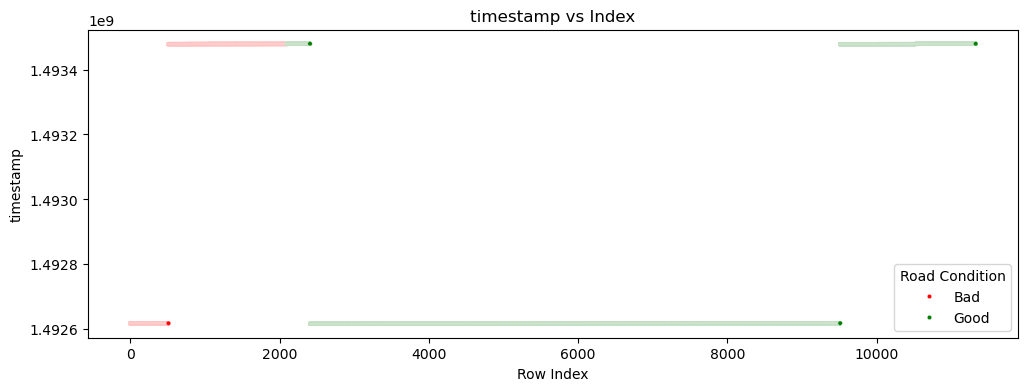

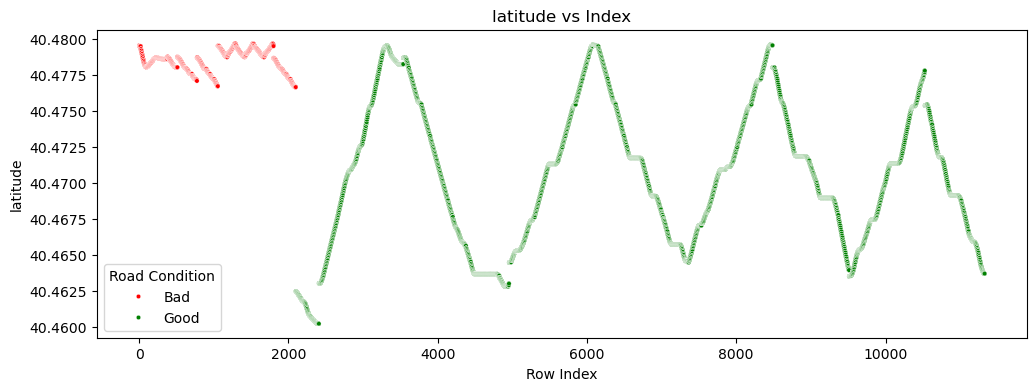

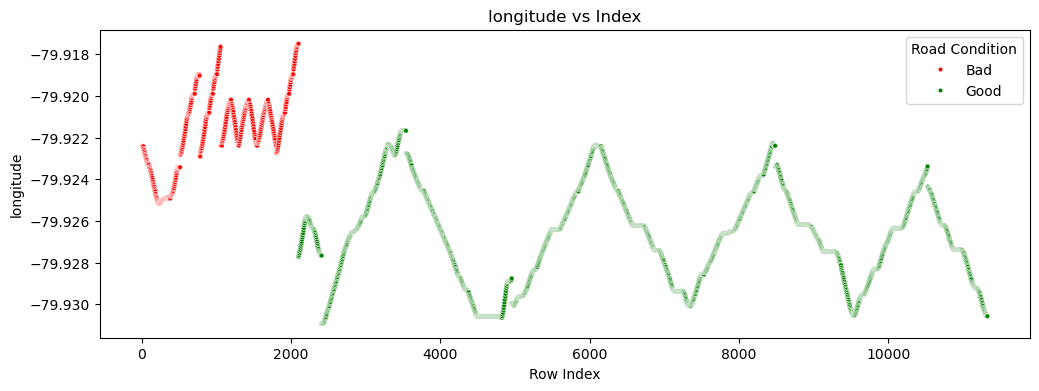

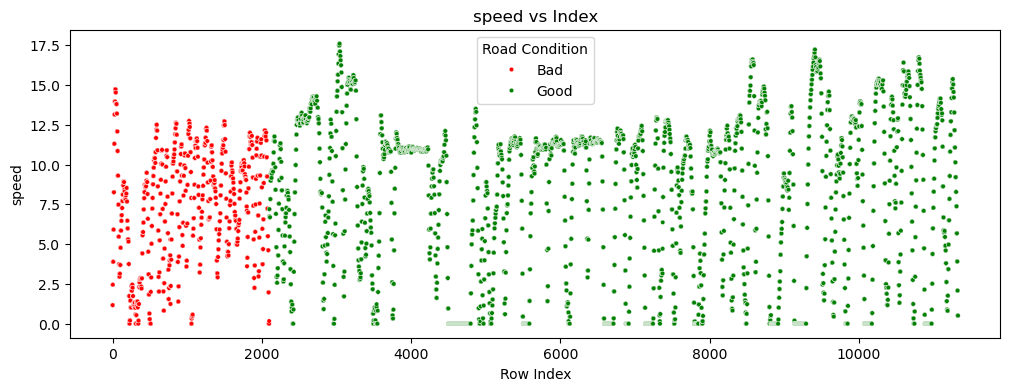

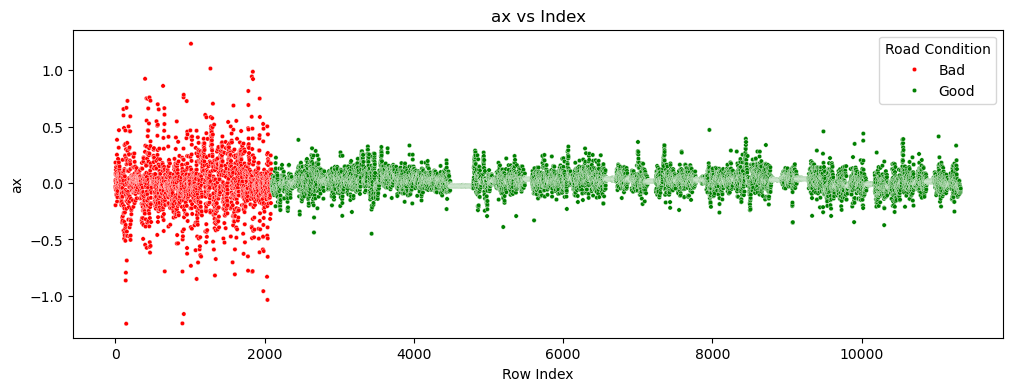

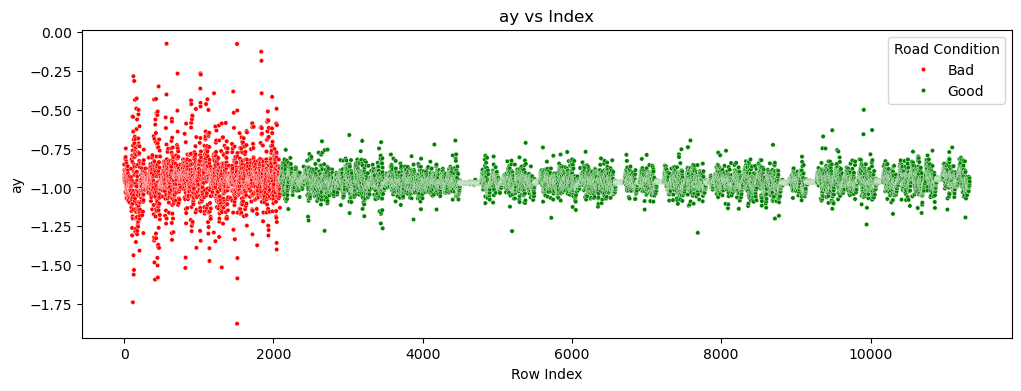

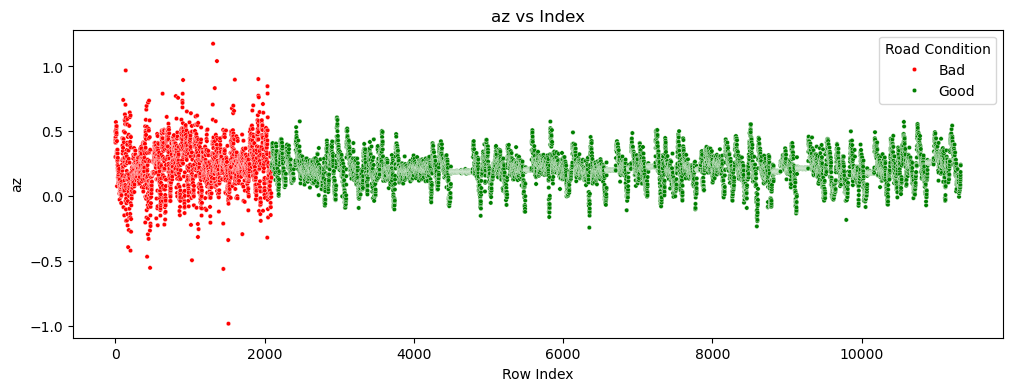

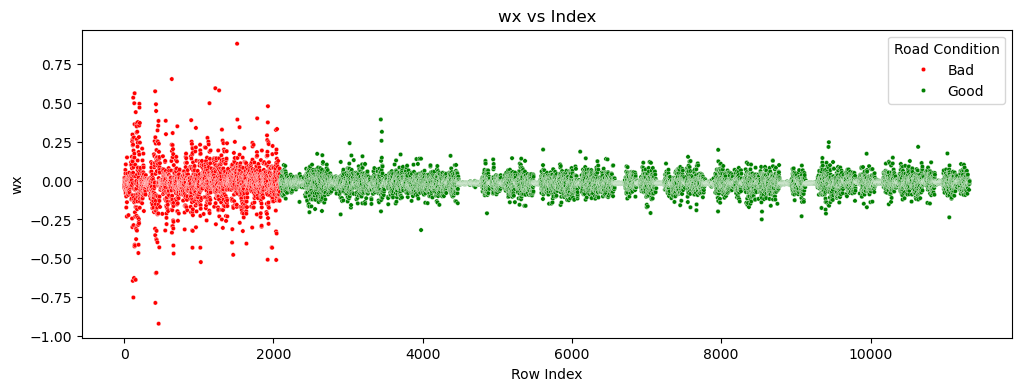

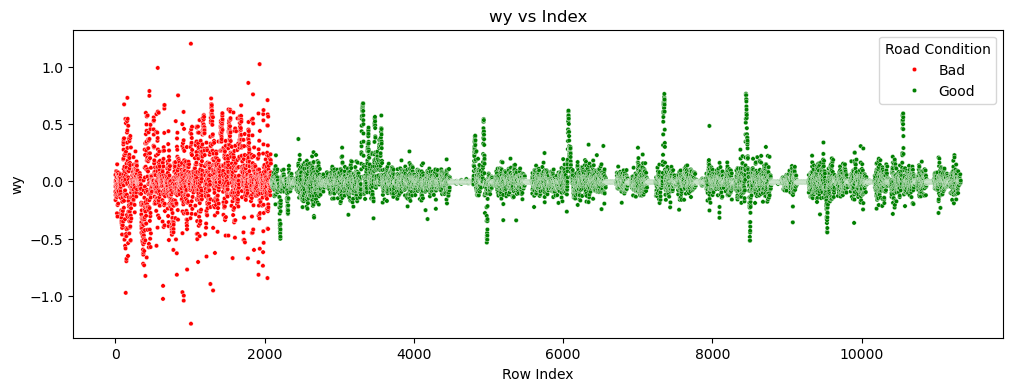

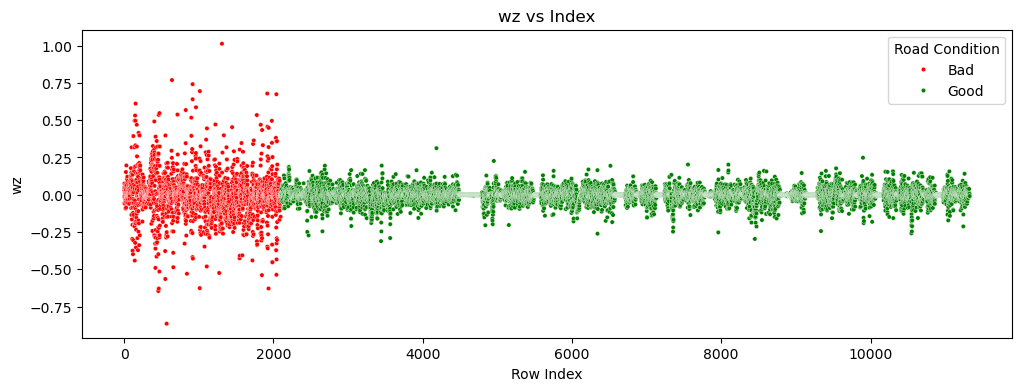

In [8]:
df = pd.read_csv("../../data/combined/binary_kaggle.csv")
import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns.drop('roadCondition')
colors = {'Good': 'green', 'Bad': 'red'}

for feature in features:
    plt.figure(figsize=(12, 4))
    sns.scatterplot(x=df.index, y=df[feature], hue=df['roadCondition'], palette=colors, s=10)
    plt.title(f'{feature} vs Index')
    plt.xlabel('Row Index')
    plt.ylabel(feature)
    plt.legend(title='Road Condition')
    plt.show()
